<a href="https://colab.research.google.com/github/Hsynyvz/Coursera/blob/main/3_week_Copy_of_Coding_Tuterboorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [ ]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_datasets = load_diabetes()

print(diabetes_datasets["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
# Save the input and target variables

data = diabetes_datasets.data
targets = diabetes_datasets.target
data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [ ]:
# Normalise the target data (this will make clearer training curves)

targets =(targets - targets.mean(axis=0)) / targets.std()

In [ ]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_data ,test_data ,train_targets , test_target = train_test_split(data,targets,test_size = 0.2)
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_target.shape)

(353, 10)
(89, 10)
(353,)
(89,)


#### Train a feedforward neural network model

In [ ]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

def get_model():
  model = Sequential([Dense(128 ,activation="relu", input_shape= (train_data[0].shape)),
                      Dense(128 ,activation="relu"),
                      Dense(128 ,activation="relu"),
                      Dense(128 ,activation="relu"),
                      Dense(128 ,activation="relu"),
                      Dense(128 ,activation="relu"),
                      Dense(1)])


  return model 
model =get_model()

In [ ]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss ="mse" ,metrics="mae")


In [ ]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets ,epochs=100 ,validation_split=0.15 ,batch_size=64 ,verbose=False)

In [ ]:
# Evaluate the model on the test set

model.evaluate(test_data,test_target ,verbose=2)

3/3 - 0s - loss: 0.9698 - mae: 0.7456


[0.9698200225830078, 0.7456387281417847]

#### Plot the learning curves

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

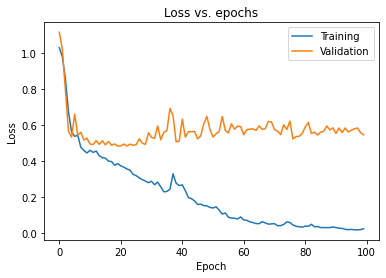

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [ ]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu",  input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [ ]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5 , 0.3)

In [ ]:
# Compile the model

model.compile(optimizer="adam", loss= "mse", metrics=["mae"])

In [ ]:
# Train the model, with some of the data reserved for validation
model.fit(train_data, train_targets ,epochs=100 ,validation_split=0.15, batch_size = 64 , verbose = False)


In [ ]:
# Evaluate the model on the test set
model.evaluate(test_data, test_target)


3/3 [==============================] - 0s 4ms/step - loss: 0.6818 - mae: 0.6233


[0.6818129420280457, 0.6232653260231018]

#### Plot the learning curves

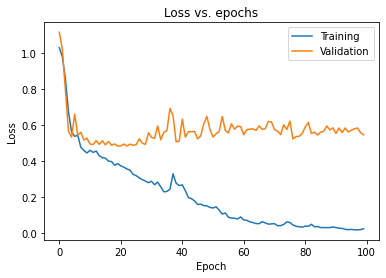

In [ ]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [ ]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

In [ ]:
# Re-build the model
unregularised_model  = get_model()


In [ ]:
# Compile the model
unregularised_model.compile(optimizer="adam", loss ="mse")

#### Train the model with the callback

In [ ]:
# Train the model, with some of the data reserved for validation

unreg_history = unregularised_model .fit(train_data,train_targets,epochs=100 ,validation_split=0.15 ,batch_size=64, verbose=2 ,
                          callbacks = tf.keras.callbacks.EarlyStopping())

NameError: ignored

In [ ]:
# Evaluate the model

 unregularised_model.evaluate(train_data,train_targets)

NameError: ignored

In [ ]:
# Make predictions with the model



***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [ ]:
# Re-train the unregularised model

from tensorflow.keras.callbacks import Callback
unregularised_model  = get_model()
unregularised_model.compile(optimizer="adam", loss ="mse")

unreg_history = model.fit(train_data,train_targets,epochs=100 ,validation_split=0.15 ,batch_size=64, verbose=2 ,
                          callbacks = tf.keras.callbacks.EarlyStopping())

Epoch 1/100
5/5 - 0s - loss: 0.3456 - mae: 0.4580 - val_loss: 0.5029 - val_mae: 0.5961
Epoch 2/100
5/5 - 0s - loss: 0.3579 - mae: 0.4757 - val_loss: 0.4839 - val_mae: 0.5947
Epoch 3/100
5/5 - 0s - loss: 0.3423 - mae: 0.4634 - val_loss: 0.4631 - val_mae: 0.5729
Epoch 4/100
5/5 - 0s - loss: 0.3266 - mae: 0.4450 - val_loss: 0.5418 - val_mae: 0.5828


In [ ]:
# Evaluate the model on the test set

unregularised_model.evaluate(test_data,test_target)

3/3 [==============================] - 0s 4ms/step - loss: 0.8263


0.782880961894989

In [ ]:
# Re-train the regularised model
reg_model = get_regularised_model(1e-5, 0.3)
reg_model.compile(optimizer="adam", loss="mse")
reg_history = reg_model.fit(train_data,train_targets, epochs=100 ,validation_split=0.15, batch_size=64 ,verbose=False,
              callbacks = tf.keras.callbacks.EarlyStopping())


In [ ]:
# Evaluate the model on the test set
reg_model.evaluate(test_data,test_target)


3/3 [==============================] - 0s 4ms/step - loss: 0.6358


0.6357707381248474

#### Plot the learning curves

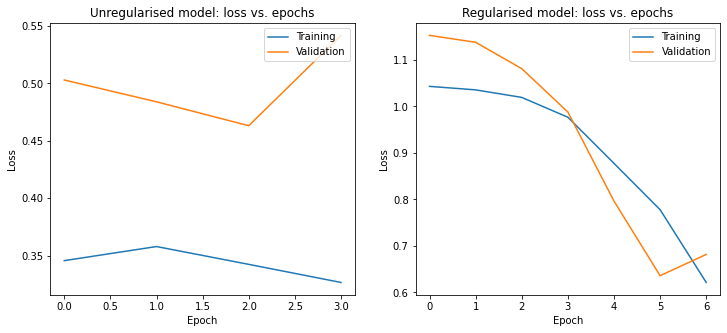

In [ ]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()